In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import requests
import os
import zipfile
from sklearn.cluster import KMeans
%matplotlib inline

### Wrangle Data

#### Gather, Assess, then Clean Data before moving on to exploratory analysis

### Gathering

In [2]:
df = pd.read_csv('201802-fordgobike-tripdata-2.csv')

### Assessing

In [3]:
df.shape

(106718, 16)

In [4]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
45361,545,2018-02-15 14:39:53.0730,2018-02-15 14:48:58.0810,258,University Ave at Oxford St,37.872355,-122.266447,274,Oregon St at Adeline St,37.857567,-122.267558,2921,Subscriber,1966.0,Male,No
4711,976,2018-02-27 19:12:25.7820,2018-02-27 19:28:42.0670,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,205,Shafter Ave at Cavour St,37.837947,-122.257243,2009,Subscriber,1973.0,Male,No
78356,594,2018-02-07 18:43:56.0660,2018-02-07 18:53:50.8740,144,Precita Park,37.747300,-122.411403,133,Valencia St at 22nd St,37.755213,-122.420975,2150,Subscriber,1982.0,Female,No
71912,139,2018-02-09 07:53:32.3240,2018-02-09 07:55:51.3380,39,Scott St at Golden Gate Ave,37.778999,-122.436861,31,Raymond Kimbell Playground,37.783813,-122.434559,1976,Subscriber,1993.0,Male,No
69495,518,2018-02-09 15:30:07.0340,2018-02-09 15:38:45.1690,118,Eureka Valley Recreation Center,37.759177,-122.436943,86,Market St at Dolores St,37.769305,-122.426826,3576,Subscriber,1969.0,Male,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106718 entries, 0 to 106717
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             106718 non-null  int64  
 1   start_time               106718 non-null  object 
 2   end_time                 106718 non-null  object 
 3   start_station_id         106718 non-null  int64  
 4   start_station_name       106718 non-null  object 
 5   start_station_latitude   106718 non-null  float64
 6   start_station_longitude  106718 non-null  float64
 7   end_station_id           106718 non-null  int64  
 8   end_station_name         106718 non-null  object 
 9   end_station_latitude     106718 non-null  float64
 10  end_station_longitude    106718 non-null  float64
 11  bike_id                  106718 non-null  int64  
 12  user_type                106718 non-null  object 
 13  member_birth_year        98626 non-null   float64
 14  memb

In [6]:
df.sample (10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
80639,1274,2018-02-07 10:52:36.5200,2018-02-07 11:13:51.4920,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,37,2nd St at Folsom St,37.785000,-122.395936,1110,Subscriber,1949.0,Male,No
73354,658,2018-02-08 18:17:14.7310,2018-02-08 18:28:13.3810,33,Golden Gate Ave at Hyde St,37.781650,-122.415408,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1226,Subscriber,1986.0,Male,No
11439,839,2018-02-26 09:07:52.9460,2018-02-26 09:21:52.2100,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,22,Howard St at Beale St,37.789756,-122.394643,2786,Subscriber,1989.0,Male,No
24857,446,2018-02-21 18:07:00.1670,2018-02-21 18:14:26.3700,342,Colin P Kelly Jr St at Townsend St (Temporary ...,37.781383,-122.389841,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,326,Subscriber,1970.0,Male,No
106040,280,2018-02-01 08:25:10.5290,2018-02-01 08:29:51.3280,116,Mississippi St at 17th St,37.764802,-122.394771,101,San Bruno Ave at 16th St,37.766008,-122.405677,3418,Subscriber,1987.0,Male,No
23513,773,2018-02-22 07:49:42.6100,2018-02-22 08:02:36.3080,85,Church St at Duboce Ave,37.770083,-122.429156,89,Division St at Potrero Ave,37.769218,-122.407646,427,Subscriber,1985.0,Female,Yes
66059,1023,2018-02-10 14:02:32.1380,2018-02-10 14:19:35.6530,130,22nd St Caltrain Station,37.757369,-122.392057,109,17th St at Valencia St,37.763316,-122.421904,2331,Customer,1993.0,Female,No
87536,259,2018-02-06 07:08:22.5610,2018-02-06 07:12:42.3890,63,Bryant St at 6th St,37.775910,-122.402575,321,5th at Folsom,37.780146,-122.403071,3729,Subscriber,1986.0,Male,No
24149,313,2018-02-21 20:44:37.8090,2018-02-21 20:49:50.9050,84,Duboce Park,37.769201,-122.433812,107,17th St at Dolores St,37.763015,-122.426497,3186,Subscriber,1983.0,Male,No
44449,298,2018-02-15 17:36:33.9120,2018-02-15 17:41:32.1650,8,The Embarcadero at Vallejo St,37.799953,-122.398525,22,Howard St at Beale St,37.789756,-122.394643,320,Subscriber,1962.0,Male,No


Detect 1: start_time and end_time is not in datetime data type.

Detect 2: Ids are ideal to be in integer datatype not float. Therefore Start_station_id, end_station_id, member_birth_year, bike_id need to change the data type.

Detect 3: user_type, member_gender, bike_share_for_all_trip should be in category and bool data type.

Detect 4: Make another column for member's age for better undestanding for the viewers.

In [7]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8092
member_gender              8056
bike_share_for_all_trip       0
dtype: int64

Detect 5: Null values detected under member_birth_year and member_gender. Drop the rows with null values

In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,98626.000000
mean,878.661913,111.781836,37.766993,-122.351936,109.508968,37.767166,-122.351129,2017.746350,1981.550707
std,2665.964460,93.857360,0.102873,0.121185,93.598881,0.102712,0.120472,1092.680093,10.877748
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,11.000000,1900.000000
25%,355.000000,30.000000,37.771058,-122.411738,30.000000,37.771662,-122.410662,1100.000000,1976.000000
50%,555.000000,81.000000,37.781383,-122.397405,81.000000,37.781383,-122.397380,2112.000000,1984.000000
75%,862.000000,176.000000,37.795393,-122.291376,176.000000,37.795812,-122.291415,2985.000000,1989.000000
max,86366.000000,342.000000,37.880222,-121.874119,342.000000,37.880222,-121.874119,3747.000000,2000.000000


In [9]:
df.duration_sec.describe()

count    106718.000000
mean        878.661913
std        2665.964460
min          61.000000
25%         355.000000
50%         555.000000
75%         862.000000
max       86366.000000
Name: duration_sec, dtype: float64

Detect 6: Expected to have large amount of outliers in duration_sec.

Detect 7: The column was so limited, so I need to extract name of the month and name of the week columns from start_time for deeper investigation.

### Cleaning

1. Change start_time and end_time data type to datetime

In [10]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

2. user_type and bike_share_for_all_trip should be in category and bool data type.

In [11]:
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106718 entries, 0 to 106717
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             106718 non-null  int64         
 1   start_time               106718 non-null  datetime64[ns]
 2   end_time                 106718 non-null  datetime64[ns]
 3   start_station_id         106718 non-null  int64         
 4   start_station_name       106718 non-null  object        
 5   start_station_latitude   106718 non-null  float64       
 6   start_station_longitude  106718 non-null  float64       
 7   end_station_id           106718 non-null  int64         
 8   end_station_name         106718 non-null  object        
 9   end_station_latitude     106718 non-null  float64       
 10  end_station_longitude    106718 non-null  float64       
 11  bike_id                  106718 non-null  int64         
 12  user_type       

3. Drop the rows with null values under member_birth_year and member_gender.

In [13]:
df = df.dropna(how='any',axis=0) 

In [14]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [15]:
df.shape

(98626, 16)

4. Make another column for member's age for better undestanding for the viewers.

In [16]:
# Refered from https://github.com/saiogirala/Ford_Bike_Communicating_Findings/blob/master/Exploratory_Data_Analysis.ipynb
df['member_age'] = 2020-df['member_birth_year']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98626 entries, 0 to 106717
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             98626 non-null  int64         
 1   start_time               98626 non-null  datetime64[ns]
 2   end_time                 98626 non-null  datetime64[ns]
 3   start_station_id         98626 non-null  int64         
 4   start_station_name       98626 non-null  object        
 5   start_station_latitude   98626 non-null  float64       
 6   start_station_longitude  98626 non-null  float64       
 7   end_station_id           98626 non-null  int64         
 8   end_station_name         98626 non-null  object        
 9   end_station_latitude     98626 non-null  float64       
 10  end_station_longitude    98626 non-null  float64       
 11  bike_id                  98626 non-null  int64         
 12  user_type                98626 

5. Change data type for Start_station_id, end_station_id, member_birth_year, bike_id to int.

In [18]:
df['start_station_id'] = df['start_station_id'].astype('int')
df['end_station_id'] = df['end_station_id'].astype('int')
df['member_birth_year'] = df['member_birth_year'].astype('int')
df['member_age'] = df['member_age'].astype('int')
df['bike_id'] = pd.to_numeric(df['bike_id'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98626 entries, 0 to 106717
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             98626 non-null  int64         
 1   start_time               98626 non-null  datetime64[ns]
 2   end_time                 98626 non-null  datetime64[ns]
 3   start_station_id         98626 non-null  int64         
 4   start_station_name       98626 non-null  object        
 5   start_station_latitude   98626 non-null  float64       
 6   start_station_longitude  98626 non-null  float64       
 7   end_station_id           98626 non-null  int64         
 8   end_station_name         98626 non-null  object        
 9   end_station_latitude     98626 non-null  float64       
 10  end_station_longitude    98626 non-null  float64       
 11  bike_id                  98626 non-null  int64         
 12  user_type                98626 

6. Large amount of outlier detected in duration_sec

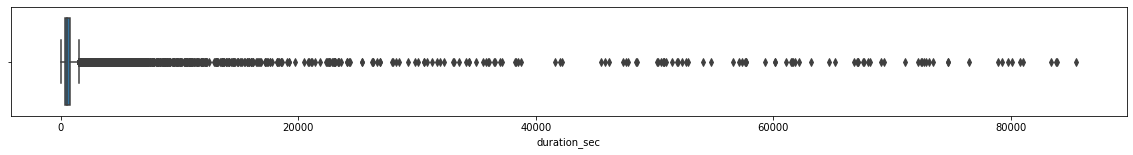

In [20]:
plt.figure(figsize = [20, 2])
sb.boxplot(data=df, x='duration_sec');

In [21]:
df = df.query('duration_sec <= 2000')

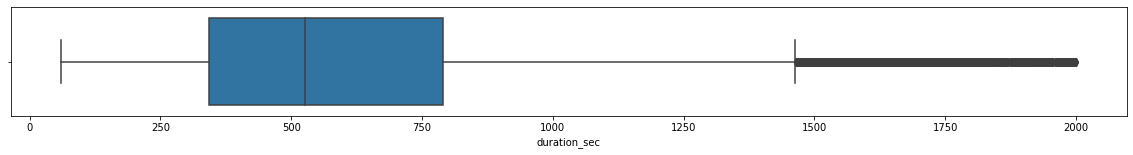

In [22]:
plt.figure(figsize = [20, 2])
sb.boxplot(data=df, x='duration_sec');

7. Extract name of the Month and name of the week from start_time.

In [23]:
eun kimdf['st_month_name']=df['start_time'].dt.strftime('%B')

SyntaxError: invalid syntax (<ipython-input-23-96025a7becb0>, line 1)

In [24]:
df['st_week_name']=df['start_time'].dt.strftime('%a')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96377 entries, 0 to 106717
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             96377 non-null  int64         
 1   start_time               96377 non-null  datetime64[ns]
 2   end_time                 96377 non-null  datetime64[ns]
 3   start_station_id         96377 non-null  int64         
 4   start_station_name       96377 non-null  object        
 5   start_station_latitude   96377 non-null  float64       
 6   start_station_longitude  96377 non-null  float64       
 7   end_station_id           96377 non-null  int64         
 8   end_station_name         96377 non-null  object        
 9   end_station_latitude     96377 non-null  float64       
 10  end_station_longitude    96377 non-null  float64       
 11  bike_id                  96377 non-null  int64         
 12  user_type                96377 

In [26]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,st_week_name
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988,Male,No,32,Wed
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6,The Embarcadero at Sansome St,37.804770,-122.403234,324,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987,Male,No,33,Wed
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308,San Pedro Square,37.336802,-121.894090,297,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976,Female,Yes,44,Wed


8. Change duration_sec to duration_min to observe better.

In [27]:
df['duration_min'] = df['duration_sec']/60

In [28]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,st_week_name,duration_min
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988,Male,No,32,Wed,9.966667
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6,The Embarcadero at Sansome St,37.804770,-122.403234,324,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987,Male,No,33,Wed,15.716667
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308,San Pedro Square,37.336802,-121.894090,297,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976,Female,Yes,44,Wed,14.750000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96377 entries, 0 to 106717
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             96377 non-null  int64         
 1   start_time               96377 non-null  datetime64[ns]
 2   end_time                 96377 non-null  datetime64[ns]
 3   start_station_id         96377 non-null  int64         
 4   start_station_name       96377 non-null  object        
 5   start_station_latitude   96377 non-null  float64       
 6   start_station_longitude  96377 non-null  float64       
 7   end_station_id           96377 non-null  int64         
 8   end_station_name         96377 non-null  object        
 9   end_station_latitude     96377 non-null  float64       
 10  end_station_longitude    96377 non-null  float64       
 11  bike_id                  96377 non-null  int64         
 12  user_type                96377 

### What is the structure of your dataset? 

201802-fordgobike-tripdata-2 dataset has 98626 rows and 17 individual columns after cleaning. 16 columns included:

 0   duration_sec (int64) 
 1   start_time (datetime64)
 2   end_time (datetime64)
 3   start_station_id (int64)
 4   start_station_name (object)
 5   start_station_latitude (float64)
 6   start_station_longitude (float64)
 7   end_station_id (int64)
 8   end_station_name (object)
 9   end_station_latitude (float64)
 10  end_station_longitude (float64)
 11  bike_id (int64)  
 12  user_type (category) 
 13  member_birth_year (int64)        
 14  member_gender (category)      
 15  bike_share_for_all_trip (category)     
 16  member_age (int64)
 
### What is/are the main feature(s) of interest in your dataset? 

For my investigation I my main interest features are the followings:

1. duration_sec
2. member_gender
3. bike_share_for_all_trip
4. member_age

### What features in the dataset do you think will help support your investigation into your feature(s) of interest? 

I think all of the features will help me investigate for this analysis, however, I think ones with duration_sec, ember_gender, bike_share_for_all_trip and member_age will help me most because it is what I am interested the most. 

## Univariate Exploration

Before we move on to the each visulizations, Let's take a over look of our data and their values

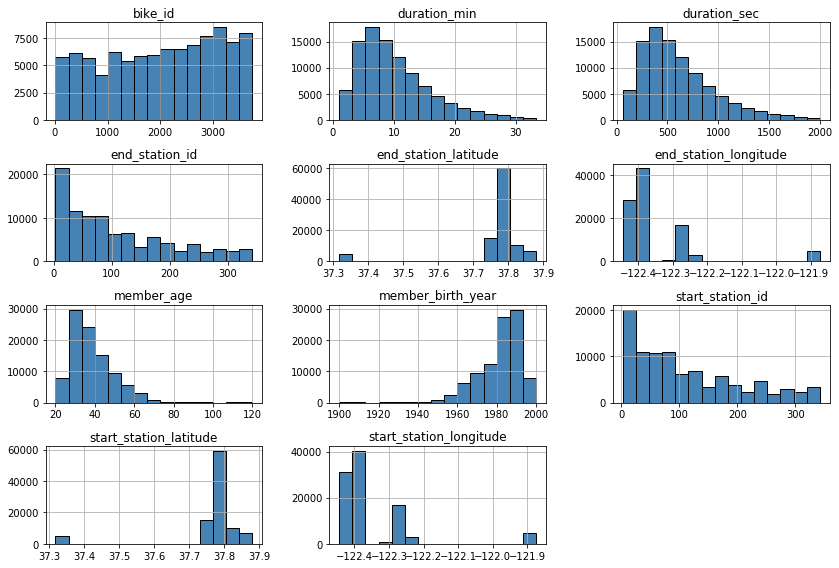

In [30]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, grid=True)    
plt.tight_layout(rect=(0, 0, 2, 2))  

## Univariate Exploration
### #1 How many people share bike ride?

In order to do this research, we need to use bike_share_for_all_trip columns. 

In [31]:
# Value count is necessary in order to do the following code
df.bike_share_for_all_trip.value_counts()

No     87436
Yes     8941
Name: bike_share_for_all_trip, dtype: int64

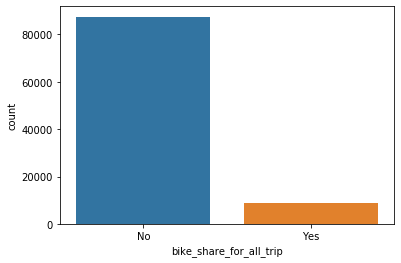

In [32]:
sb.countplot(data = df, x = 'bike_share_for_all_trip');

Above graph demonstrates overall quantity of "Yes" and "No" in bike_share_for_all_trip column

In [33]:
# Numbers are saved in order to do the appropriate proportion. 
exp_val = [89145,9481]
exp_label = ["No", "Yes"]

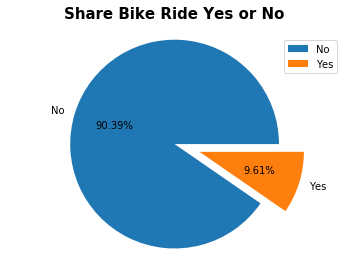

In [34]:
plt.axis("equal")
plt.title('Share Bike Ride Yes or No', fontsize=15, y=1.05, fontweight='semibold')
plt.pie(exp_val,labels=exp_label,radius=1.2,autopct='%0.2f%%',explode=[0,0.3], )
plt.legend(('No','Yes'));

This graph demonstrates over all proportion of "Yes" and "No" from entire population. 

Observation:
> In the pie chart, I convey the result of my research on "How many people share bike ride?". This graph demonstrate people who shares the bike ride and who doesn't share the bike riding in percentage. According to the data and more clearly on the vidualization, Definetly "No" is from majority of the people. As a result of this, we figured that majority (90.39%) of people did not share the bike ride.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?¶

I presented my distribution on pie chart because it represents the whole proportion of the population and they divided into two pieces. So it is much easier to interpret the porportion of Yes and No. I expected this same result so there weren't any unsual points. I predicted that more bike rider do not share their bike because they rented for their own use. For this visualization i used two set of graph. First basic bar graph is to show general overall quantity of each values and second pie chart is for proportion of each values. This tranformaiton into our visulization will help viewers understand the data and multiple aspects. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?¶

I used the explode function to put some pad between two values to make distinctive and easier to view. I've also used autopct function to round the decimal to the hundredths places to fit the number into pie. 

## Bivariate Exploration
### #2 How long did the different gender group ride a bike? (Duration (sec) vs Member gender)

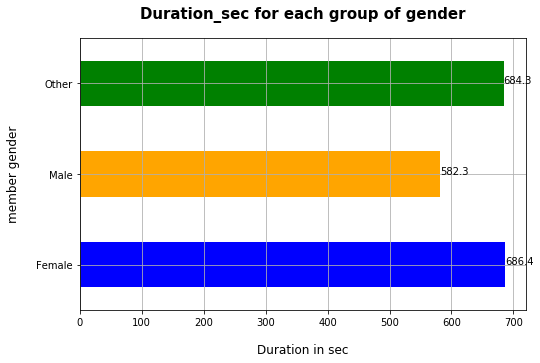

In [35]:
new_color = ['blue', 'orange', 'green']
ax = df.groupby('member_gender')['duration_sec'].mean().plot(kind='barh', color=new_color, figsize=(8,5))
plt.title('Duration_sec for each group of gender', fontsize=15, y=1.05, fontweight='semibold')
plt.ylabel('member gender', labelpad=16,  fontsize=12)
plt.xlabel('Duration in sec', labelpad=16,  fontsize=12)
plt.xticks(rotation=360)
plt.grid()
# To view the actual values for each group
[ax.text(v, i, '{:.1f}'.format(v)) for i, v in enumerate(df.groupby(['member_gender'])['duration_sec'].mean())];

I used bar graph and label it with it's value since difference between other and female is so minor.

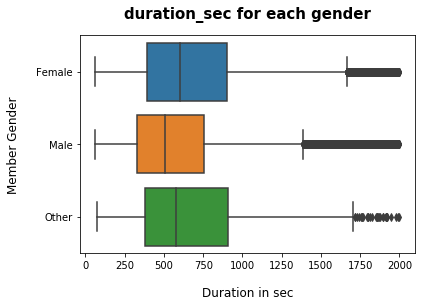

In [36]:
sb.boxplot(x='duration_sec', y='member_gender', data=df)
plt.title('duration_sec for each gender', fontsize=15, y=1.05, fontweight='semibold')
plt.ylabel('Member Gender', labelpad=16,  fontsize=12)
plt.xlabel('Duration in sec', labelpad=16,  fontsize=12);

Box plot demonstrates overall average in different aspects. Compare to bar graph, this graph helps us to interpret better on outliers on female and other gender. female gender have more outlier then other gender group.

Observation:
>In these Bar and box plot, I displayed how each group of gender have different duration in sec. As you can see from the graph, male gender holds lowest average duration sec compared to other two genders. However, it was diffcult to compare female and other gender average duration in sec. So I placed numeric value of on top of each bars in the graph. In a slight difference (2.1) female group had highest duration_sec in average. In addition to this, I also made a visualization of box plot that displays min, max median, Q1 and Q3. What I noticed from this box plot is that male group had significantly low max rate compared to other two gender group and overall lower median, Q1 and Q3. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?¶

I observed that female and other gender had pretty similar mean duration seconds. In order to compare which has more duration second, I implimented value label on box graph. As a result of that I figured out that female gender had 2.1 seconds more mean duration in second then other gender. This is very slight difference so it was impossible to notice on the visualization. On the other hand, male had comparatively lower mean duration in second compared to other two genders. This is distictive on both graphs. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?¶

Since this graph was relationship between qualitative values vs. quantitative values there weren't direct correation between two features. However we can make an assumption that as mean duration in sec increases female and other gender increases faster rate then male gender. 

## Multivariate Exploration
### #3 How is each user type's duration in min in every day of the week? 
### (User type VS Start week name VS duration in min)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


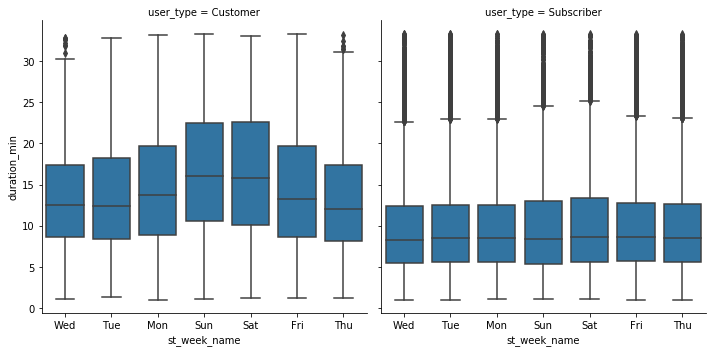

In [37]:
g = sb.FacetGrid(data = df, col = 'user_type', size = 5)
g.map(sb.boxplot, 'st_week_name', 'duration_min')
# To display day of the week in order
df.st_week_name= pd.Categorical(df.st_week_name, categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

I have displayed two spaces for usertype. One for customer and other for substriber. 

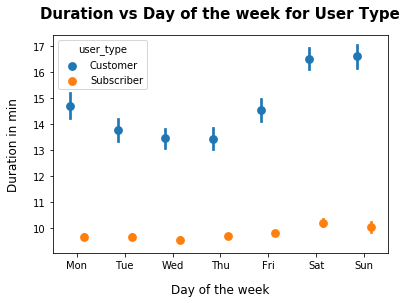

In [38]:
sb.pointplot(data=df, x='st_week_name', y='duration_min', hue='user_type', dodge=0.3, linestyles='')
plt.title('Duration vs Day of the week for User Type', fontsize=15, y=1.05, fontweight='semibold')
plt.xlabel('Day of the week', labelpad=13, fontsize=12)
plt.ylabel('Duration in min', labelpad=13, fontsize=12)
df.st_week_name= pd.Categorical(df.st_week_name, categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

Pointplot shows the flow of duration in min for each week very clearly. 

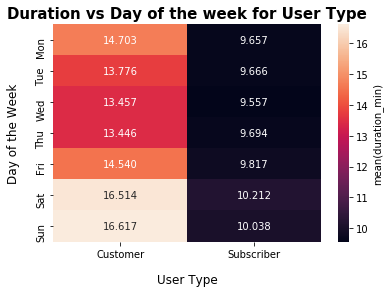

In [39]:
df2 = df.groupby(['user_type', 'st_week_name']).mean()['duration_min']
df2 = df2.reset_index(name = 'duration_min_avg')
df2 = df2.pivot(index = 'st_week_name', columns = 'user_type',
                            values = 'duration_min_avg')
sb.heatmap(df2, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min)'});
plt.title('Duration vs Day of the week for User Type', fontsize=15, fontweight='semibold')
plt.ylabel('Day of the Week', labelpad=16,  fontsize=12)
plt.xlabel('User Type', labelpad=14,  fontsize=12)
df.st_week_name= pd.Categorical(df.st_week_name, categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

Color palette displays differences between customer and subscriber by color. 

Observation:
>I made a research on how each user type's duration in min varies in each day of the week. In order to conclude this result more precise, I displayed three visualizations. You can see overall distinctions between customer's and subscriber's differenciate from all three graphs. I laid the day of the week in order to make is easier to interpret to the audiance. As you can see on the first box plot, even with the glance, you can cleary conclude that user type cusomter's duration in min is relatively higher then user type subscriber's duration in min. You can also see that on Saturday and Sunday presents relatively higher average duration in min compare to other day of the week. Same asect showed on second visulization. For the last visualization, I used color palette to present. The color on the graph represent the mean of duration in min. As they have darker the color it means the lower the duration in min. As you can see, subscriber repersent much darker color then customer. Like other two graph, this last graph presents relatively higher average duratin in min on Sunday and Saturday compared to other day of the week. 

>As a result of this research, we can conclude that average duration in custmomer is much higher then average duration in subscriber. Especially on Saturday and Sunday presents much higher average duration in min compared to other day of the week. However, subscriber's day of the week is hard to differenciate due to their minor changes in each day. However, on point plot, we can tell that Saturday and Sunday represent higher then other day of the week.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?¶

As I mentioned in the observation above, I found that customer's duration in min is much higher then duration for subscribers. I have used color palette and pointplot to disticnt the differences between each relation much easier and faster. This color distinction was helpful in many ways. This function helps audience to interpret the graph and flow at a glance. 

### Were there any interesting or surprising interactions between features?¶

I was expecting more mean duration time during weekends because people can spend more time on bike riding. Howeer, It was little surprising to see huge difference between customer and subscriber mean duration time. Including weekdays and weekends there were substantial gap between customer's and subscriber's mean duration time. 

## Reference

https://datatofish.com/string-to-integer-dataframe/ 

https://www.youtube.com/watch?v=GOuUGWGUT14 


In [42]:
! jupyter nbconvert <notebook_name>.ipynb --to slides --post serve --template output_toggle

/bin/sh: notebook_name: No such file or directory
